#### Importing Libraries and Dependencies


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data preprocessing

##### Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 189661 files belonging to 107 classes.


##### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 50125 files belonging to 107 classes.


In [5]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[188.75 177.75 193.75]
   [187.75 179.75 194.75]
   [193.25 187.25 201.25]
   ...
   [166.75 158.75 173.75]
   [188.5  180.5  195.5 ]
   [155.   147.   162.  ]]

  [[184.5  175.5  192.5 ]
   [184.25 176.25 191.25]
   [196.   190.   204.  ]
   ...
   [176.25 168.25 183.25]
   [172.25 164.25 179.25]
   [165.25 157.25 172.25]]

  [[187.5  178.5  195.5 ]
   [186.   177.   194.  ]
   [192.   183.   200.  ]
   ...
   [180.25 172.25 187.25]
   [189.25 181.25 196.25]
   [186.25 178.25 193.25]]

  ...

  [[121.   111.   136.  ]
   [135.5  125.5  150.5 ]
   [127.5  117.5  142.5 ]
   ...
   [141.5  130.5  147.5 ]
   [138.25 127.25 144.25]
   [122.   111.   128.  ]]

  [[119.5  109.5  134.5 ]
   [122.5  112.5  137.5 ]
   [133.   123.   148.  ]
   ...
   [140.25 129.25 146.25]
   [126.   115.   132.  ]
   [122.25 111.25 128.25]]

  [[115.25 105.25 130.25]
   [119.5  109.5  134.5 ]
   [120.75 110.75 135.75]
   ...
   [127.   116.   133.  ]
   [128.75 117.75 134.75]
   [131.25 120.25 13

#### Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))])

##### Building Convolution layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3), padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [13]:
model.add(Dropout(0.25)) # 25% of neurons will be turned off randomly during each epoch | to avoid overfitting

In [14]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1024, activation='relu'))

In [16]:
model.add(Dropout(0.4)) # 40% of neurons will be turned off randomly during each epoch | to avoid overfitting

##### Output Layer

In [17]:
model.add(Dense(units=107, activation='softmax'))

##### Compiling Model

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        36928     
                                                        

#### Training Model

In [23]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
5927/5927 [==============================] - 814s 137ms/step - loss: 0.6147 - accuracy: 0.7856 - val_loss: 0.5577 - val_accuracy: 0.8017
Epoch 2/10
5927/5927 [==============================] - 811s 137ms/step - loss: 0.5216 - accuracy: 0.8112 - val_loss: 0.5234 - val_accuracy: 0.8136
Epoch 3/10
5927/5927 [==============================] - 840s 142ms/step - loss: 0.4679 - accuracy: 0.8270 - val_loss: 0.4991 - val_accuracy: 0.8173
Epoch 4/10
5927/5927 [==============================] - 681s 115ms/step - loss: 0.4263 - accuracy: 0.8397 - val_loss: 0.4837 - val_accuracy: 0.8242
Epoch 5/10
5927/5927 [==============================] - 832s 140ms/step - loss: 0.3942 - accuracy: 0.8494 - val_loss: 0.4755 - val_accuracy: 0.8272
Epoch 6/10
5927/5927 [==============================] - 845s 143ms/step - loss: 0.3691 - accuracy: 0.8564 - val_loss: 0.4665 - val_accuracy: 0.8317
Epoch 7/10
5927/5927 [==============================] - 857s 144ms/step - loss: 0.3490 - accuracy: 0.8630 - val_

#### Model Evaluation

##### On Training set

In [24]:
train_loss, train_acc = model.evaluate(training_set)

5927/5927 [==============================] - 375s 63ms/step - loss: 0.2396 - accuracy: 0.9014


In [25]:
print(train_loss, train_acc)

0.23955193161964417 0.9014188647270203


##### On Evaluation set

In [26]:
val_loss, val_acc = model.evaluate(validation_set)

1567/1567 [==============================] - 93s 59ms/step - loss: 0.4675 - accuracy: 0.8310


In [27]:
print(val_loss, val_acc)

0.4675207734107971 0.8310224413871765


#### Saving Model

In [28]:
model.save('trained_model.keras')

In [29]:
training_history.history

{'loss': [0.6146596074104309,
  0.5216187238693237,
  0.4679234027862549,
  0.42631083726882935,
  0.3941742181777954,
  0.3691401481628418,
  0.34895193576812744,
  0.3315913677215576,
  0.3162706792354584,
  0.30358776450157166],
 'accuracy': [0.7856333255767822,
  0.8112316131591797,
  0.8270440697669983,
  0.8397035002708435,
  0.8493786454200745,
  0.8564069867134094,
  0.8630240559577942,
  0.8690927624702454,
  0.8734636902809143,
  0.8766747117042542],
 'val_loss': [0.5576643347740173,
  0.5233593583106995,
  0.4990968704223633,
  0.4836747646331787,
  0.4754720628261566,
  0.46652790904045105,
  0.46608105301856995,
  0.45802539587020874,
  0.47527778148651123,
  0.4675210118293762],
 'val_accuracy': [0.8017356395721436,
  0.8135660886764526,
  0.8172568678855896,
  0.8242393732070923,
  0.8272319436073303,
  0.8317207098007202,
  0.8298054933547974,
  0.8343740701675415,
  0.8298254609107971,
  0.8310224413871765]}

#### Recording History
JSON format

In [30]:
import json
with open('training_history.json', 'w') as f:
    json.dump(str(training_history.history), f)

#### Accuracy Visualization

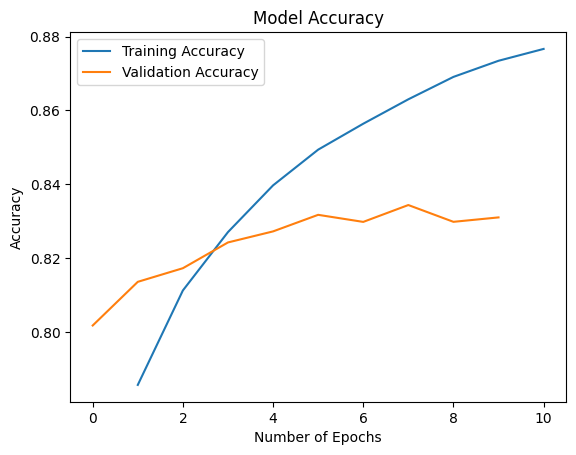

In [31]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

#### Some other metrics of model evaluation

In [32]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Apple___rust',
 'Apple___scab',
 'Blueberry___healthy',
 'Cassava___bacterial_blight',
 'Cassava___brown_streak_disease',
 'Cassava___green_mottle',
 'Cassava___healthy',
 'Cassava___mosaic_disease',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Cherry___healthy',
 'Cherry___powdery_mildew',
 'Chili___healthy',
 'Chili___leaf curl',
 'Chili___leaf spot',
 'Chili___whitefly',
 'Chili___yellowish',
 'Coffee___cercospora_leaf_spot',
 'Coffee___healthy',
 'Coffee___red_spider_mite',
 'Coffee___rust',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Corn___common_rust',
 'Corn___gray_leaf_spot',
 'Corn___healthy',
 'Corn___northern_leaf_blight',
 'Cucumber___diseased',
 'Cucumber___healthy',
 'Gauva___diseased',
 'Gauva___healthy',
 'Grape___Black_rot',

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 50125 files belonging to 107 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

1567/1567 [==============================] - 59s 38ms/step


(array([[9.99991894e-01, 6.34369286e-08, 6.95460508e-13, ...,
         4.05554466e-30, 2.64323426e-38, 1.18403946e-33],
        [9.99991894e-01, 6.34391029e-08, 6.95459207e-13, ...,
         4.05566842e-30, 2.64329480e-38, 1.18406655e-33],
        [9.13004041e-01, 5.61431423e-02, 2.44694519e-07, ...,
         1.41340597e-19, 1.60303032e-25, 5.55861913e-25],
        ...,
        [1.86314296e-07, 5.92929759e-08, 6.51288872e-07, ...,
         1.79548934e-02, 6.86010826e-05, 4.91925748e-03],
        [3.46422639e-05, 1.71430614e-07, 4.39351948e-04, ...,
         2.16103140e-02, 7.16624498e-01, 1.33964177e-02],
        [1.42298887e-07, 5.73265502e-13, 2.84521544e-08, ...,
         2.47932728e-02, 3.31350475e-06, 8.96165967e-02]], dtype=float32),
 (50125, 107))

In [35]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(50125,), dtype=int64, numpy=array([  0,   0,   0, ...,  67, 105,  30], dtype=int64)>

In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(50125, 107), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [37]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(50125,), dtype=int64, numpy=array([  0,   0,   0, ..., 106, 106, 106], dtype=int64)>

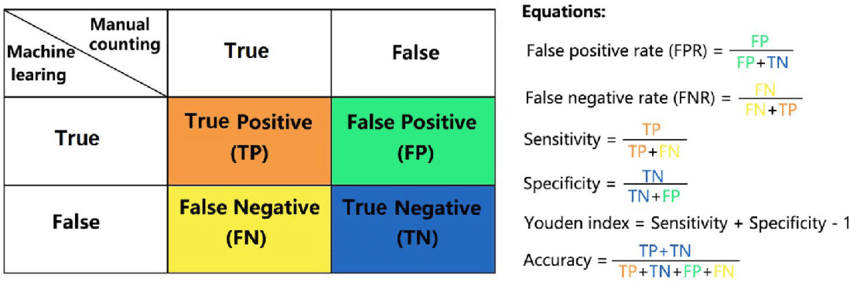

In [38]:
from sklearn.metrics import confusion_matrix, classification_report 

In [39]:
print(classification_report(Y_true, predicted_categories, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.76      0.77      0.77      1008
                                 Apple___Black_rot       0.95      0.96      0.96      1099
                          Apple___Cedar_apple_rust       0.87      0.86      0.87       880
                                   Apple___healthy       0.95      0.96      0.95      1274
                                      Apple___rust       0.03      0.03      0.03        72
                                      Apple___scab       0.03      0.04      0.03       140
                               Blueberry___healthy       0.97      0.92      0.94       908
                        Cassava___bacterial_blight       0.26      0.28      0.27        98
                    Cassava___brown_streak_disease       0.30      0.16      0.21       112
                            Cassava___green_mottle       0.18      0.08      0.

c:\Users\abhas\anaconda3\envs\epics_project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhas\anaconda3\envs\epics_project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhas\anaconda3\envs\epics_project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [40]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[ 776,   28,   12, ...,    0,    0,    0],
       [  12, 1059,    0, ...,    0,    0,    0],
       [  14,    6,  754, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,  160,    0,    8],
       [   0,    0,    0, ...,    0,   15,    2],
       [   0,    0,    0, ...,    7,    5,  139]], dtype=int64)

#### Confusion Matix Visualization

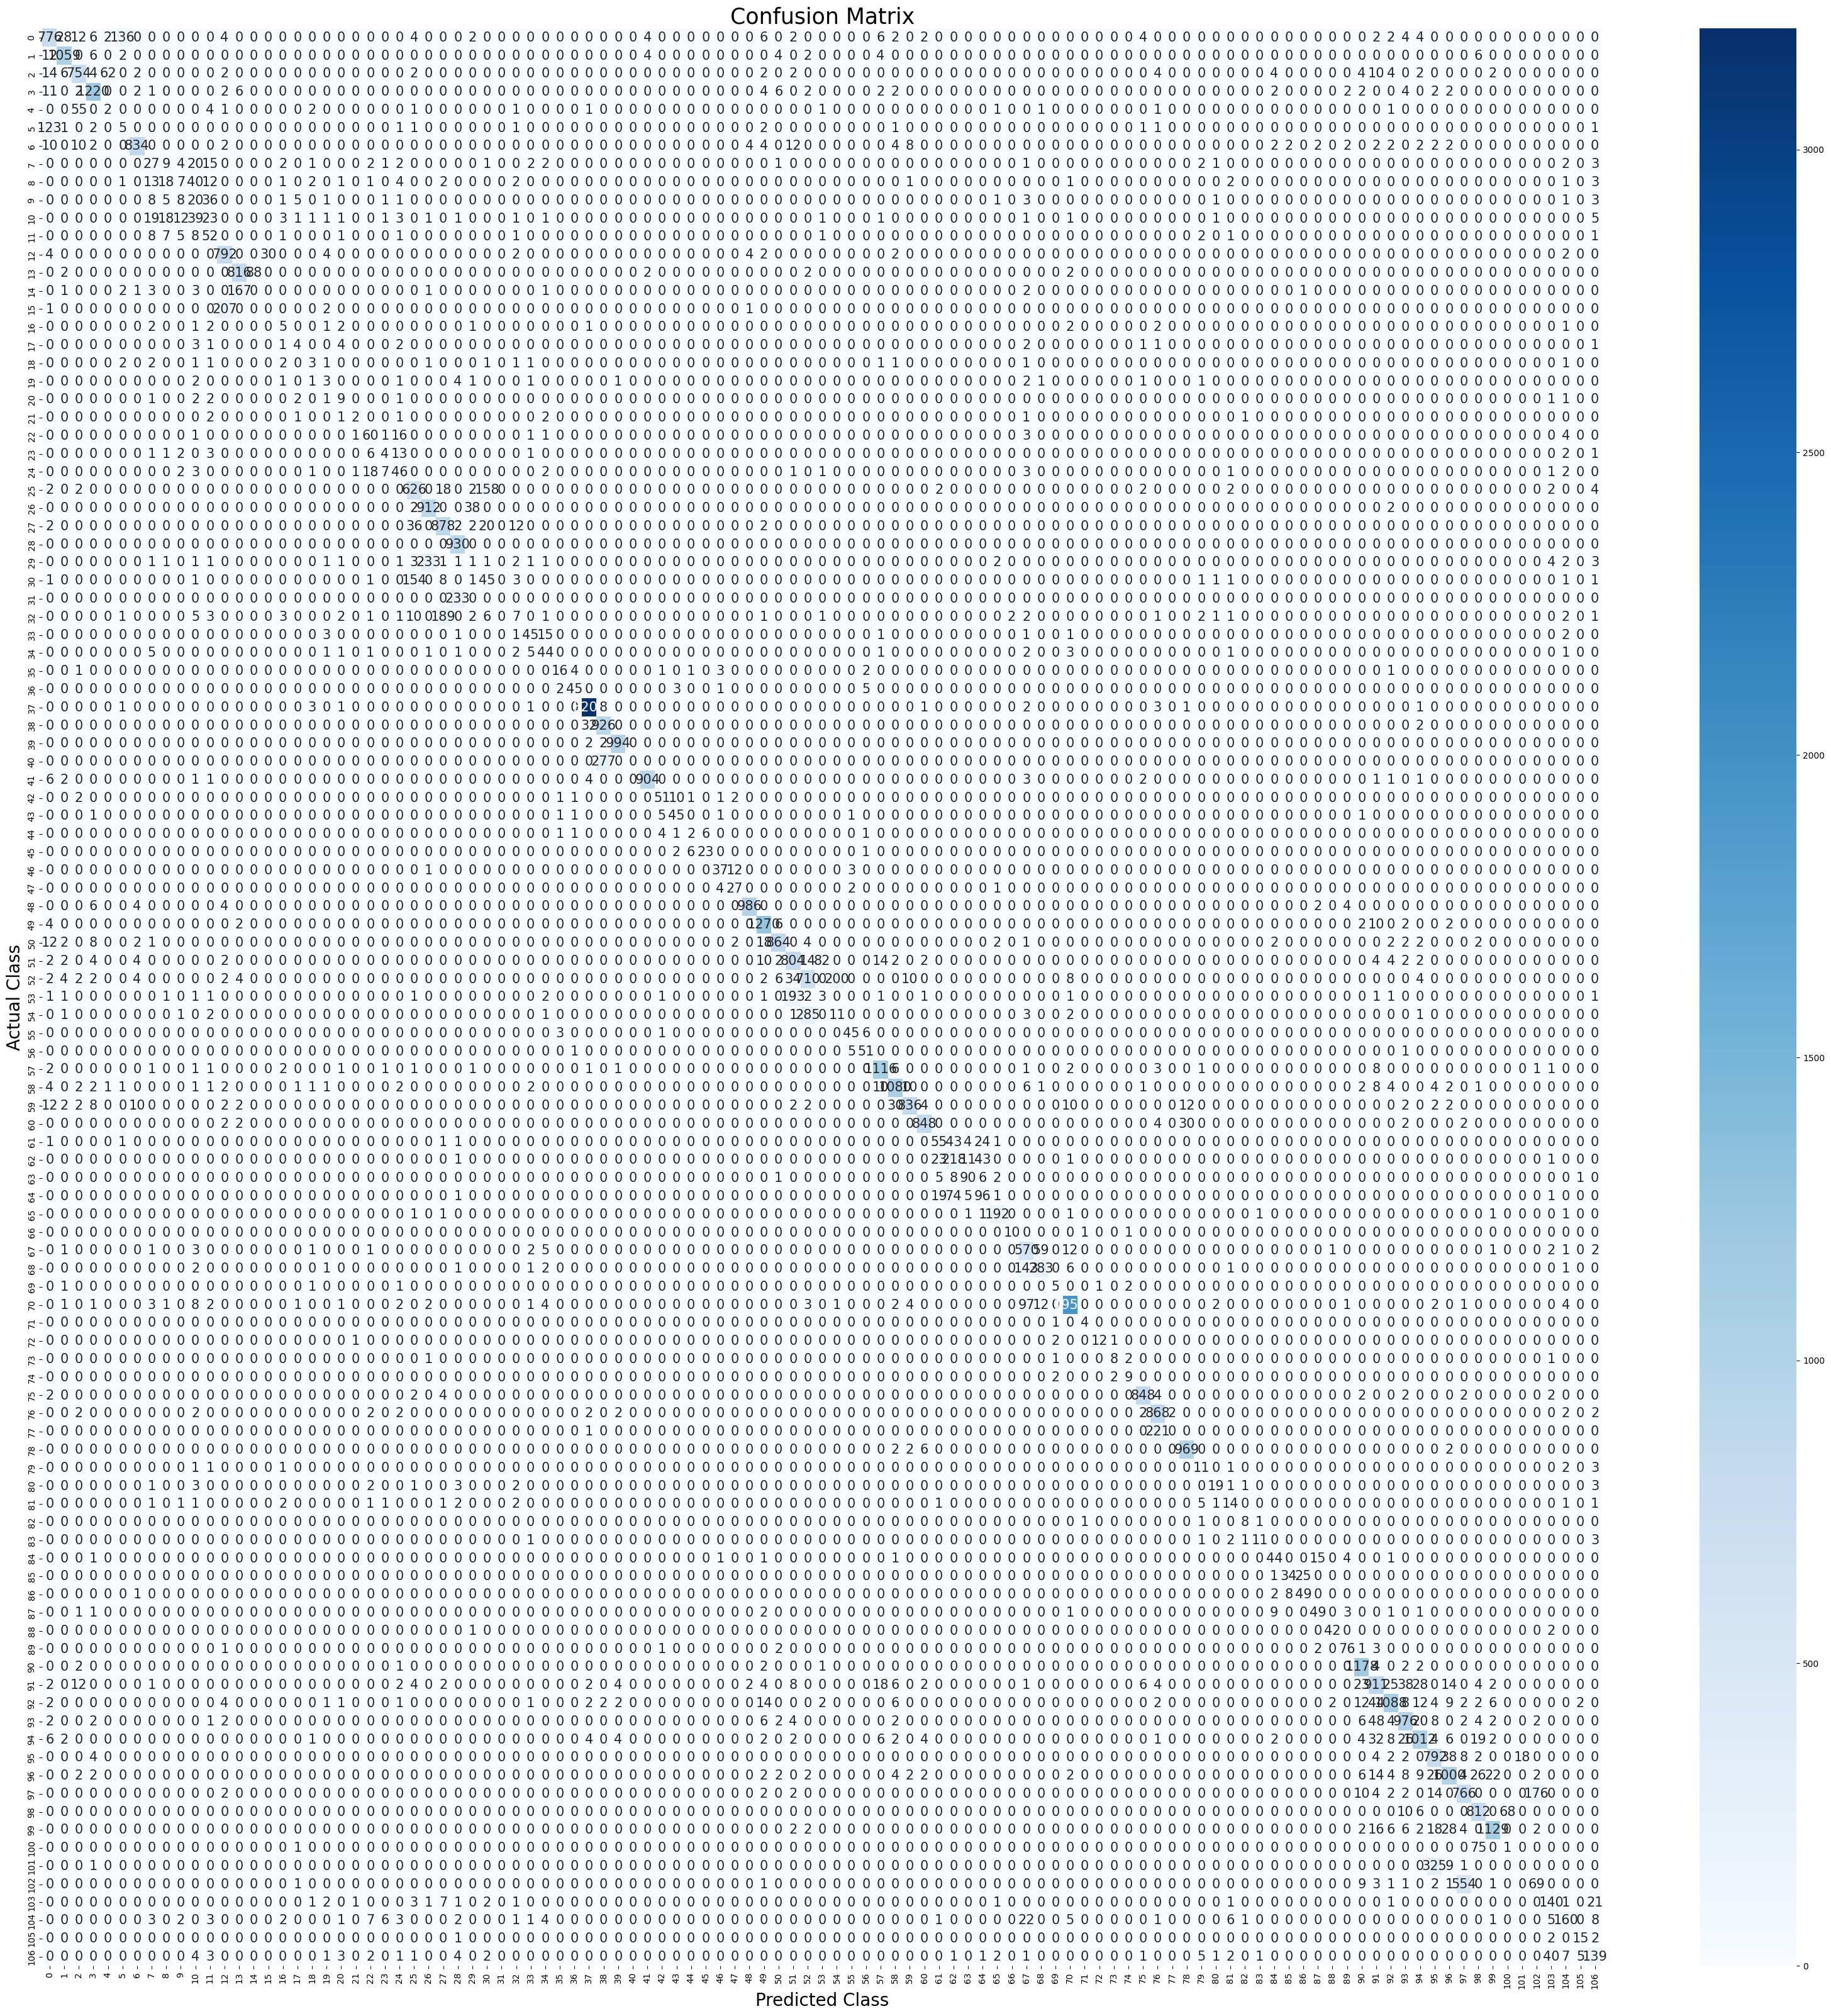

In [43]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={'size': 15}, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.show()